In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# PHASE 2

In [15]:
# Preparing the data

df_3 = pd.read_csv('data\station_40.csv')
df_1 = pd.read_csv('data\station_49.csv')
df_4 = pd.read_csv('data\station_63.csv')
df_2 = pd.read_csv('data\station_80.csv')

col1 = [col + '_1' for col in df_1.columns]
col2 = [col + '_2' for col in df_2.columns]
col3 = [col + '_3' for col in df_3.columns]
col4 = [col + '_4' for col in df_4.columns]
col1[0] = col2[0] = col3[0] = col4[0] = "YEAR"

df_1.columns = col1
df_2.columns = col2
df_3.columns = col3
df_4.columns = col4

full_df = df_1.merge(df_2, on="YEAR").merge(df_3, on="YEAR").merge(df_4, on="YEAR")
full_df.head()

,YEAR,W_1_1,W_2_1,W_3_1,W_4_1,W_5_1,W_6_1,W_7_1,W_8_1,W_9_1,...,W_10_4,W_11_4,W_12_4,W_13_4,W_14_4,W_15_4,W_16_4,W_17_4,W_18_4,YIELD_4
0,0,20.487164,26.089329,25.394672,27.024097,24.426756,26.420241,25.534358,21.369482,18.577526,...,1.462204,3.951453,2.101091,1.141454,2.167033,7.972668,1.555216,6.219460,2.081787,5.97
1,1,21.430837,22.228488,24.205256,29.859199,30.434175,26.467017,27.300290,22.509277,16.388211,...,1.036085,0.879651,5.583977,0.319974,1.612761,3.304209,0.060819,1.540583,3.214933,5.77
2,2,18.841767,25.165941,24.169267,28.742330,27.342035,27.945379,25.710641,22.343698,19.797961,...,3.295700,2.556876,2.165009,2.165768,1.791010,3.012968,4.316012,2.021236,0.814444,8.65
3,3,18.359661,20.235180,22.714217,30.017206,27.192345,23.159092,23.287619,19.477149,18.917730,...,2.872424,3.686682,4.716563,2.837129,0.638416,2.147741,3.114913,1.106072,0.870118,1.07
4,4,21.125963,23.270596,22.949896,26.594044,31.557704,28.464610,27.306957,26.999664,16.666535,...,2.240781,2.920387,1.472874,1.235341,3.050564,0.899664,1.561179,0.975300,3.242242,7.40


In [16]:
# Reorganising columns

full_df = full_df[['YEAR', 'W_1_1', 'W_2_1', 'W_3_1', 'W_4_1', 'W_5_1', 'W_6_1', 'W_7_1',
       'W_8_1', 'W_9_1', 'W_10_1', 'W_11_1', 'W_12_1', 'W_13_1', 'W_14_1',
       'W_15_1', 'W_16_1', 'W_17_1', 'W_18_1', 'W_1_2', 'W_2_2',
       'W_3_2', 'W_4_2', 'W_5_2', 'W_6_2', 'W_7_2', 'W_8_2', 'W_9_2', 'W_10_2',
       'W_11_2', 'W_12_2', 'W_13_2', 'W_14_2', 'W_15_2', 'W_16_2', 'W_17_2',
       'W_18_2', 'W_1_3', 'W_2_3', 'W_3_3', 'W_4_3', 'W_5_3',
       'W_6_3', 'W_7_3', 'W_8_3', 'W_9_3', 'W_10_3', 'W_11_3', 'W_12_3',
       'W_13_3', 'W_14_3', 'W_15_3', 'W_16_3', 'W_17_3', 'W_18_3',
       'W_1_4', 'W_2_4', 'W_3_4', 'W_4_4', 'W_5_4', 'W_6_4', 'W_7_4', 'W_8_4',
       'W_9_4', 'W_10_4', 'W_11_4', 'W_12_4', 'W_13_4', 'W_14_4', 'W_15_4',
       'W_16_4', 'W_17_4', 'W_18_4', 'YIELD_1','YIELD_2', 'YIELD_3', 'YIELD_4']]

In [17]:
full_df.head()

,YEAR,W_1_1,W_2_1,W_3_1,W_4_1,W_5_1,W_6_1,W_7_1,W_8_1,W_9_1,...,W_13_4,W_14_4,W_15_4,W_16_4,W_17_4,W_18_4,YIELD_1,YIELD_2,YIELD_3,YIELD_4
0,0,20.487164,26.089329,25.394672,27.024097,24.426756,26.420241,25.534358,21.369482,18.577526,...,1.141454,2.167033,7.972668,1.555216,6.219460,2.081787,6.37,10.51,10.32,5.97
1,1,21.430837,22.228488,24.205256,29.859199,30.434175,26.467017,27.300290,22.509277,16.388211,...,0.319974,1.612761,3.304209,0.060819,1.540583,3.214933,5.54,6.61,10.39,5.77
2,2,18.841767,25.165941,24.169267,28.742330,27.342035,27.945379,25.710641,22.343698,19.797961,...,2.165768,1.791010,3.012968,4.316012,2.021236,0.814444,4.39,6.86,8.49,8.65
3,3,18.359661,20.235180,22.714217,30.017206,27.192345,23.159092,23.287619,19.477149,18.917730,...,2.837129,0.638416,2.147741,3.114913,1.106072,0.870118,9.28,5.32,7.28,1.07
4,4,21.125963,23.270596,22.949896,26.594044,31.557704,28.464610,27.306957,26.999664,16.666535,...,1.235341,3.050564,0.899664,1.561179,0.975300,3.242242,8.86,6.32,7.31,7.40


In [18]:
# Adding T and R

full_df["T"] = np.sum(full_df[['W_1_1', 'W_2_1', 'W_3_1', 'W_4_1', 'W_5_1', 'W_6_1', 'W_7_1','W_8_1', 'W_9_1', 
                'W_1_2', 'W_2_2', 'W_3_2', 'W_4_2', 'W_5_2', 'W_6_2', 'W_7_2', 'W_8_2', 'W_9_2',
                'W_1_3', 'W_2_3', 'W_3_3', 'W_4_3', 'W_5_3','W_6_3', 'W_7_3', 'W_8_3', 'W_9_3',
                'W_1_4', 'W_2_4', 'W_3_4', 'W_4_4', 'W_5_4', 'W_6_4', 'W_7_4', 'W_8_4', 'W_9_4'
                ]], axis=1) / 36

full_df["R"] = np.sum(full_df[['W_13_1', 'W_14_1','W_15_1', 'W_13_2', 'W_14_2', 'W_15_2', 
                'W_13_3', 'W_14_3', 'W_15_3', 'W_13_4', 'W_14_4', 'W_15_4'
                ]], axis=1) / 12

full_df.head()

,YEAR,W_1_1,W_2_1,W_3_1,W_4_1,W_5_1,W_6_1,W_7_1,W_8_1,W_9_1,...,W_15_4,W_16_4,W_17_4,W_18_4,YIELD_1,YIELD_2,YIELD_3,YIELD_4,T,R
0,0,20.487164,26.089329,25.394672,27.024097,24.426756,26.420241,25.534358,21.369482,18.577526,...,7.972668,1.555216,6.219460,2.081787,6.37,10.51,10.32,5.97,22.404683,2.122557
1,1,21.430837,22.228488,24.205256,29.859199,30.434175,26.467017,27.300290,22.509277,16.388211,...,3.304209,0.060819,1.540583,3.214933,5.54,6.61,10.39,5.77,22.910263,1.443749
2,2,18.841767,25.165941,24.169267,28.742330,27.342035,27.945379,25.710641,22.343698,19.797961,...,3.012968,4.316012,2.021236,0.814444,4.39,6.86,8.49,8.65,23.096885,1.401006
3,3,18.359661,20.235180,22.714217,30.017206,27.192345,23.159092,23.287619,19.477149,18.917730,...,2.147741,3.114913,1.106072,0.870118,9.28,5.32,7.28,1.07,21.252078,1.563658
4,4,21.125963,23.270596,22.949896,26.594044,31.557704,28.464610,27.306957,26.999664,16.666535,...,0.899664,1.561179,0.975300,3.242242,8.86,6.32,7.31,7.40,23.344850,1.398759


In [19]:
# Creating masks

cold = full_df["T"] <= 21.2
mild = (full_df["T"] > 21.2) & (full_df["T"] <= 22)
hot = full_df["T"] > 22

low_rain = full_df["R"] <= 1.8
mild_rain = (full_df["R"] > 1.8) & (full_df["R"] <= 2.2)
strong_rain = full_df["R"] > 2.2

temps = [cold, mild, hot]
rains = [low_rain, mild_rain, strong_rain]

In [20]:

dico = {i: {"df": None} for i in range(1, 10)}
i = 1

for rain in rains:
    for temp in temps:
        target_df = pd.DataFrame(i * np.ones(len(full_df[rain][temp].index)), columns=['Target'])
        dico[i]["df"] = pd.concat([full_df[rain][temp].reset_index(drop=True), target_df['Target'].reset_index(drop=True)], axis=1)
        print(dico[i]["df"].shape)
        i += 1


(464, 80)
(1290, 80)
(1678, 80)
(534, 80)
(1254, 80)
(1082, 80)
(1007, 80)
(1690, 80)
(1001, 80)


In [21]:
dico[2]['df'].loc[:, ['YIELD_1', 'YIELD_2', 'YIELD_3', 'YIELD_4', 'Target']]
dataframes = [class_info["df"] for class_info in dico.values()]
result_df = pd.concat(dataframes, ignore_index=True)
result_df

,YEAR,W_1_1,W_2_1,W_3_1,W_4_1,W_5_1,W_6_1,W_7_1,W_8_1,W_9_1,...,W_16_4,W_17_4,W_18_4,YIELD_1,YIELD_2,YIELD_3,YIELD_4,T,R,Target
0,19,18.476308,23.817124,20.674186,24.532081,24.538233,24.059399,20.786797,20.047547,17.761069,...,1.925873,2.214208,3.027216,4.14,3.97,14.15,0.00,20.214486,1.656016,1.0
1,34,17.551278,18.332946,20.427173,23.673247,27.419524,27.465407,26.604432,22.851546,17.568044,...,2.734749,3.002762,1.480039,3.74,4.13,11.08,0.00,20.693984,1.704576,1.0
2,60,16.371976,20.685583,26.106958,27.942493,24.940137,28.198224,22.421124,22.178844,16.380707,...,0.744357,0.864020,0.756209,4.52,5.91,7.63,0.58,21.141664,1.571121,1.0
3,63,16.288702,20.956192,21.899313,24.420679,25.120857,25.121803,23.767839,22.577199,15.801733,...,5.547670,3.289487,3.411061,6.75,4.97,10.14,0.58,20.499037,1.697597,1.0
4,83,17.682848,20.138859,21.627761,26.758458,28.258324,23.577831,21.152038,22.010505,15.522964,...,6.316350,1.109799,1.323852,7.17,4.64,7.92,0.00,20.371150,1.736981,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9949,21.299199,21.036710,26.973592,25.171760,26.695255,27.066270,26.901078,24.020256,15.091100,...,1.071131,0.828729,4.264373,7.80,13.44,11.00,6.54,22.752009,2.462556,9.0
9996,9972,19.459887,20.624134,25.281969,25.198594,24.149320,27.401954,25.072407,22.933790,19.025484,...,5.594181,4.094905,1.346525,9.57,12.57,11.50,3.99,22.005694,3.112543,9.0
9997,9977,18.397148,25.060288,26.653394,23.933769,26.175277,27.160514,26.126396,23.540509,17.321525,...,0.710050,2.251276,2.583358,6.26,11.80,13.28,4.81,22.304359,2.538473,9.0
9998,9998,19.488528,23.736181,23.895066,28.550779,25.095031,27.253641,24.912120,24.014287,18.288172,...,1.346895,1.014101,1.062314,12.01,11.88,10.12,4.86,22.486542,2.437957,9.0


## Generating synthetic data

Run either ADASYN cell or SVM SMOTE (ADASYN outputs better mean SWD)

### ADASYN

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN

n_neighbors = 9

# Extract features and target
X = result_df[['YIELD_1', 'YIELD_2', 'YIELD_3', 'YIELD_4']]
y = result_df['Target']

# Calculate the minority class count for setting the `sampling_strategy`
minority_class_count = y.value_counts().min()

# Apply ADASYN
adasyn = ADASYN(sampling_strategy='minority', random_state=42, n_neighbors=n_neighbors)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Calculate the minority class count for setting the `sampling_strategy`
minority_class_count = y_resampled.value_counts().min()
adasyn = ADASYN(sampling_strategy='minority', random_state=42, n_neighbors=n_neighbors)
X_resampled, y_resampled = adasyn.fit_resample(X_resampled, y_resampled)

# Combine the resampled data into a new DataFrame
synthetic_data = pd.DataFrame(X_resampled, columns=['YIELD_1', 'YIELD_2', 'YIELD_3', 'YIELD_4'])
synthetic_data['Target'] = y_resampled
sample = ['YIELD_1', 'YIELD_2', 'YIELD_3', 'YIELD_4']

scaler = StandardScaler(with_mean=False)
data_norm = scaler.fit_transform(X)
df_norm = pd.DataFrame(data_norm, columns=X.columns)

scaler = StandardScaler(with_mean=False)
data_norm_synth = scaler.fit_transform(synthetic_data.drop(['Target'], axis=1))
df_norm_synth  = pd.DataFrame(data_norm_synth , columns=synthetic_data.drop(['Target'], axis=1).columns)


### SVM-SMOTE

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SVMSMOTE

k_neighbors = 3
m_neighbors = 9

# Extract features and target
X = result_df[['YIELD_1', 'YIELD_2', 'YIELD_3', 'YIELD_4']]
y = result_df['Target']

# Calculate the minority class count for setting the `sampling_strategy`
minority_class_count = y.value_counts().min()

# Apply ADASYN
svmsmote = SVMSMOTE(sampling_strategy='minority', random_state=42, k_neighbors=k_neighbors, m_neighbors=m_neighbors)
X_resampled, y_resampled = svmsmote.fit_resample(X, y)

# Calculate the minority class count for setting the `sampling_strategy`
minority_class_count = y_resampled.value_counts().min()
svmsmote = SVMSMOTE(sampling_strategy='minority', random_state=42, k_neighbors=k_neighbors, m_neighbors=m_neighbors)
X_resampled, y_resampled = svmsmote.fit_resample(X_resampled, y_resampled)

# Combine the resampled data into a new DataFrame
synthetic_data = pd.DataFrame(X_resampled, columns=['YIELD_1', 'YIELD_2', 'YIELD_3', 'YIELD_4'])
synthetic_data['Target'] = y_resampled
sample = ['YIELD_1', 'YIELD_2', 'YIELD_3', 'YIELD_4']

scaler = StandardScaler(with_mean=False)
data_norm = scaler.fit_transform(X)
df_norm = pd.DataFrame(data_norm, columns=X.columns)

scaler = StandardScaler(with_mean=False)
data_norm_synth = scaler.fit_transform(synthetic_data.drop(['Target'], axis=1))
df_norm_synth  = pd.DataFrame(data_norm_synth , columns=synthetic_data.drop(['Target'], axis=1).columns)

Then run the following 3 cells: \
- compute bgm for each scenerio
- Find optimal component + post process les données <0 et >15.75
- Reproduit 10 fois le résultat

In [23]:
from sklearn.mixture import BayesianGaussianMixture
import warnings
yields = ["YIELD_1", "YIELD_2", "YIELD_3", "YIELD_4"]
warnings.filterwarnings('ignore', category=UserWarning)

dico_synth = {i: {"df": None} for i in range(1, 10)}
i = 1
for rain in rains:
    for temp in temps:
        dico_synth[i]["df"] = synthetic_data[synthetic_data['Target']==i]
        print(dico_synth[i]["df"].shape)
        i += 1

        
for i in dico:
    bgm = BayesianGaussianMixture(n_components=20, n_init=10, random_state=42)
    bgm.fit(dico_synth[i]["df"][yields])
    dico_synth[i]["bgm"] = bgm
    dico_synth[i]["bgm_weights"] = bgm.weights_.round(1)    

(1716, 5)
(1290, 5)
(1678, 5)
(1733, 5)
(1254, 5)
(1082, 5)
(1007, 5)
(1690, 5)
(1001, 5)


In [26]:
from sklearn.mixture import GaussianMixture

for i in dico_synth:
    print(i, (dico_synth[i]["bgm_weights"] > 0).sum())
    dico_synth[i]["optimal_components"] = (dico_synth[i]["bgm_weights"] > 0).sum()
    
for i in range(1,10):
    gm = GaussianMixture(n_components=dico_synth[i]["optimal_components"], n_init=10)
    gm.fit(dico_synth[i]["df"][yields])
    dico_synth[i]["gm"] = gm
    dico_synth[i]["sample"] = gm.sample(len(dico_synth[i]["df"]))[0]
    dico_synth[i]["sample"] = np.where(dico_synth[i]["sample"] > 15.75, 15.75, dico_synth[i]["sample"])
    dico_synth[i]["sample"] = np.where(dico_synth[i]["sample"] < 0, 0, dico_synth[i]["sample"])
    print(i, dico_synth[i]["sample"].shape)

1 9
2 7
3 8
4 9
5 5
6 6
7 4
8 7
9 7
1 (1716, 4)
2 (1290, 4)
3 (1678, 4)
4 (1733, 4)
5 (1254, 4)
6 (1082, 4)
7 (1007, 4)
8 (1690, 4)
9 (1001, 4)


In [27]:
#  Dernière cell à run, ça calcule les SWD des données synthétiques
#  Displaying the SWDs
import ot
SWDs_synth = []

for i in range(1, 10):
    yield_synth = dico_synth[i]["df"][yields].to_numpy()
    dico_synth[i]["SWDs_synth"] = ot.sliced.sliced_wasserstein_distance(yield_synth, dico_synth[i]["sample"], seed=0)
    SWDs_synth.append(dico_synth[i]["SWDs_synth"])
    print(f"{i} SWDs_synth: {dico_synth[i]['SWDs_synth']}")

print(f"\n Mean SWDs_synth: {np.mean(SWDs_synth)}")

1 SWDs_synth: 0.10302590597353452


2 SWDs_synth: 0.08355761739797185
3 SWDs_synth: 0.09155915226639462
4 SWDs_synth: 0.10266386694396457
5 SWDs_synth: 0.08688906456070399
6 SWDs_synth: 0.11013997355566896
7 SWDs_synth: 0.14737274303971876
8 SWDs_synth: 0.08693084891723102
9 SWDs_synth: 0.12119627248294024

 Mean SWDs_synth: 0.10370393834868095


Stop running cells, on vient juste de calculer les SWD_synth (SWD des donnés synthetiques)
Maintenant go à l'avant dernière cellule du fichier, car les suivantes c'est juste de la visualisation et ton code 

### Visualisation et code initial de mathieu

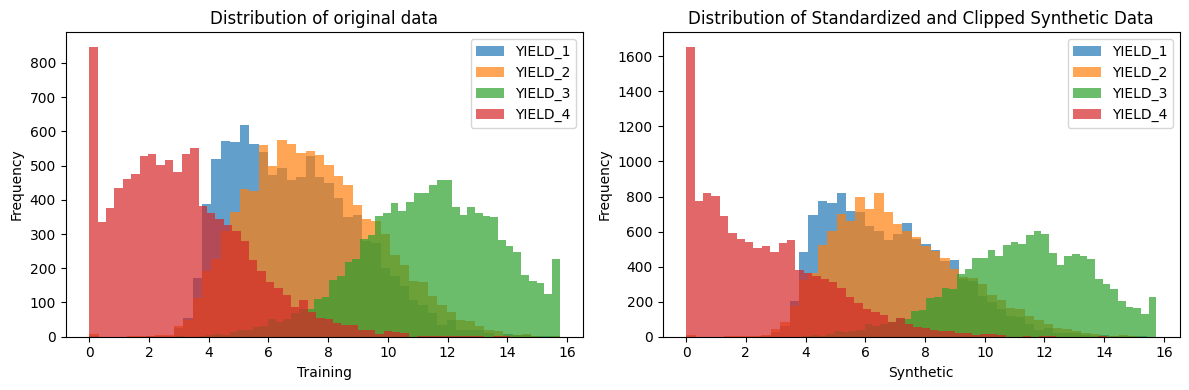

In [79]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

# Plot the distribution of each feature for original data
axs[0].set_title('Distribution of original data')
for column in X.columns:
    axs[0].hist(X[column], bins=50, label=column, alpha=0.7)
axs[0].set_xlabel('Training')
axs[0].set_ylabel('Frequency')
axs[0].legend()

# Plot the distribution of each feature for synthetic data
axs[1].set_title('Distribution of Standardized and Clipped Synthetic Data')
for column in synthetic_data.drop(['Target'], axis=1).columns:
    axs[1].hist(synthetic_data.drop(['Target'], axis=1)[column], bins=50, label=column, alpha=0.7)
axs[1].set_xlabel('Synthetic')
axs[1].set_ylabel('Frequency')
axs[1].legend()

plt.tight_layout()
plt.show()


In [213]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
data_norm = scale.fit_transform(synthetic_data.drop(['Target'], axis=1))
df_norm = pd.DataFrame(data_norm, columns=synthetic_data.drop(['Target'], axis=1).columns)
from sklearn.mixture import GaussianMixture

for i in range(1,10):
    gm = GaussianMixture(n_components=dico[i]["optimal_components"], n_init=10)
    gm.fit(dico[i]["df"][yields])
    dico[i]["gm"] = gm
    dico[i]["sample"] = gm.sample(len(dico[i]["df"]))[0]
    dico[i]["sample"] = np.where(dico[i]["sample"] > 15.75, 15.75, dico[i]["sample"])
    dico[i]["sample"] = np.where(dico[i]["sample"] < 0, 0, dico[i]["sample"])
    print(i, dico[i]["sample"].shape)


In [ ]:
# On a maintenant un bon dico pour travailler !!

In [116]:
cold = full_df["T"] <= 21.2
mild = (full_df["T"] > 21.2) & (full_df["T"] <= 22)
hot = full_df["T"] > 22

low_rain = full_df["R"] <= 1.8
mild_rain = (full_df["R"] > 1.8) & (full_df["R"] <= 2.2)
strong_rain = full_df["R"] > 2.2

temps = [cold, mild, hot]
rains = [low_rain, mild_rain, strong_rain]

In [117]:
import numpy as np

cat_df = full_df.copy()

for i, temp_category in enumerate(temps):
    for j, rain_category in enumerate(rains):
        mask = temp_category & rain_category
        indices = full_df[mask].index
        cat_df.loc[indices, f'Temperature_Rain_{i + 1}_{j + 1}'] = np.ones(len(indices))


### Modelling with Gaussian Mixture

In [127]:
cat_df = cat_df.fillna(0)
cat_df[cat_df.columns[-7:]].value_counts()

Temperature_Rain_1_3  Temperature_Rain_2_1  Temperature_Rain_2_2  Temperature_Rain_2_3  Temperature_Rain_3_1  Temperature_Rain_3_2  Temperature_Rain_3_3
0.0                   0.0                   0.0                   1.0                   0.0                   0.0                   0.0                     1690
                                                                  0.0                   1.0                   0.0                   0.0                     1678
                      1.0                   0.0                   0.0                   0.0                   0.0                   0.0                     1290
                      0.0                   1.0                   0.0                   0.0                   0.0                   0.0                     1254
                                            0.0                   0.0                   0.0                   1.0                   0.0                     1082
1.0                   0.0                 

In [86]:
# Getting the optimal number of components from a BGM

from sklearn.mixture import BayesianGaussianMixture
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

for i in dico:
    bgm = BayesianGaussianMixture(n_components=20, n_init=10, random_state=42)
    bgm.fit(dico[i]["df"][yields])
    dico[i]["bgm"] = bgm
    dico[i]["bgm_weights"] = bgm.weights_.round(1)    

In [87]:
# Storing them

for i in dico:
    print(i, (dico[i]["bgm_weights"] > 0).sum())
    dico[i]["optimal_components"] = (dico[i]["bgm_weights"] > 0).sum()

1 7
2 7
3 8
4 4
5 5
6 6
7 4
8 7
9 7


In [88]:
# Training a GM for each subset
# Generating a sample for each of them

from sklearn.mixture import GaussianMixture

for i in range(1,10):
    gm = GaussianMixture(n_components=dico[i]["optimal_components"], n_init=10)
    gm.fit(dico[i]["df"][yields])
    dico[i]["gm"] = gm
    dico[i]["sample"] = gm.sample(len(dico[i]["df"]))[0]
    dico[i]["sample"] = np.where(dico[i]["sample"] > 15.75, 15.75, dico[i]["sample"])
    dico[i]["sample"] = np.where(dico[i]["sample"] < 0, 0, dico[i]["sample"])
    print(i, dico[i]["sample"].shape)


1 (464, 4)
2 (1290, 4)
3 (1678, 4)
4 (534, 4)
5 (1254, 4)
6 (1082, 4)
7 (1007, 4)
8 (1690, 4)
9 (1001, 4)


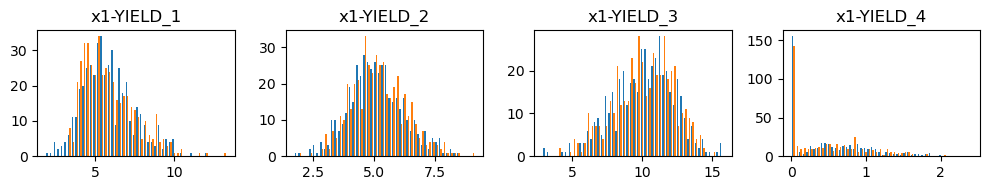

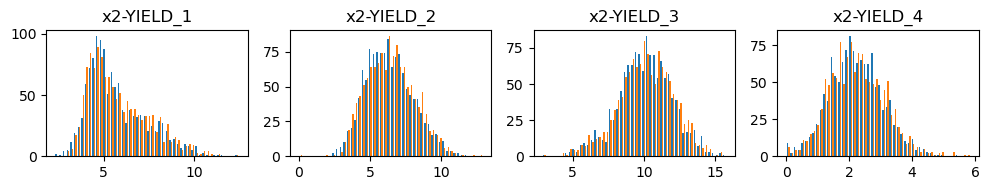

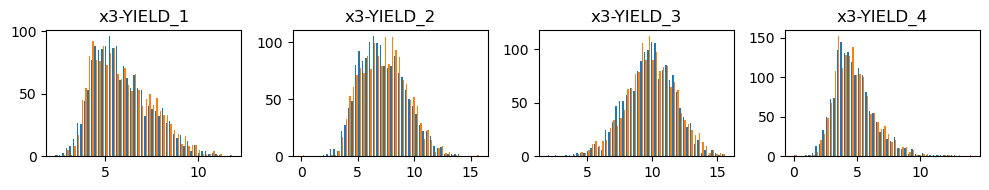

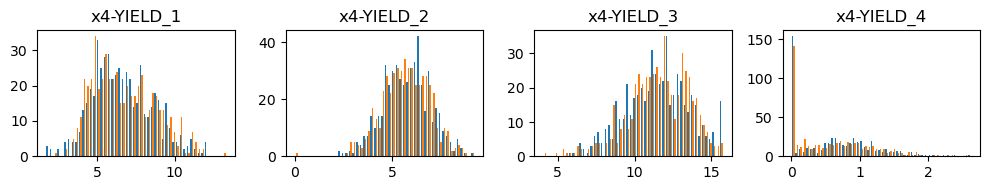

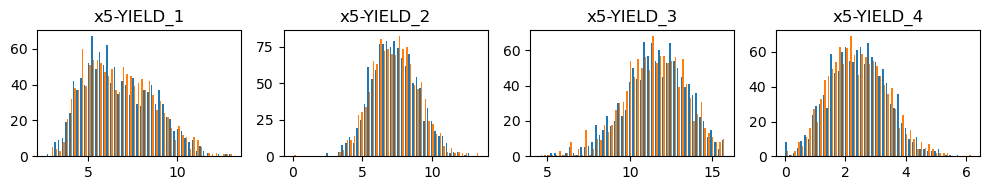

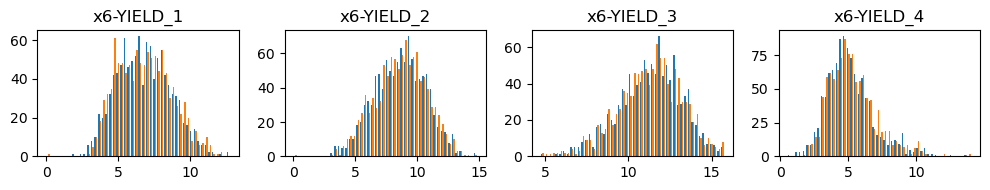

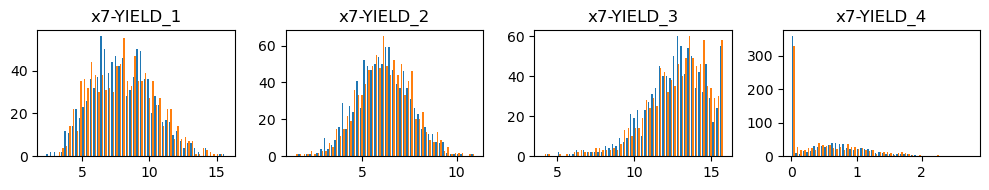

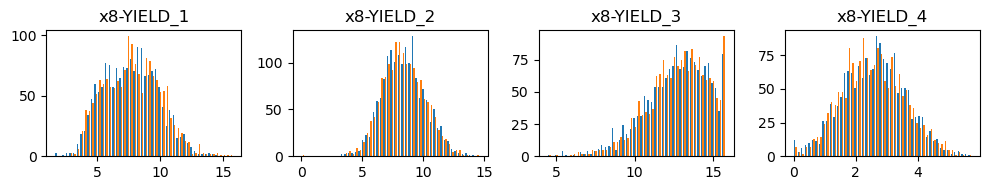

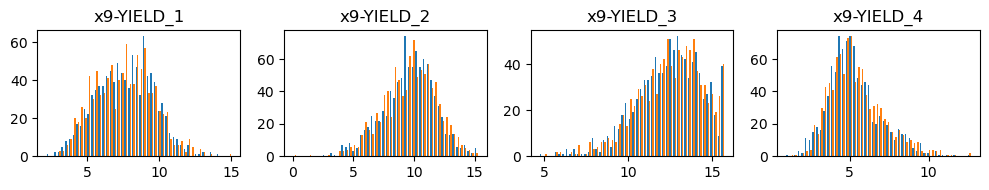

In [89]:
# Let's have a look -- bang bang
for dico_number in range(1,10):
    fig, axs = plt.subplots(1, 4, figsize=(10, 2))
    for i in range(4): 
        axs[i].hist([dico[dico_number]["sample"][:,i], dico[dico_number]["df"][yields[i]]], bins=50)
        axs[i].set_title(f"x{dico_number}-{yields[i]}")
    plt.tight_layout()
    plt.show()

# Generation results and comparison to baseline

Do not run the baseline result below but run the cell right after

In [100]:
# BASELINE
# Displaying the SWDs
SWDs = []

for i in range(1, 10):
    true_yield = dico[i]["df"][yields].to_numpy()
    dico[i]["SWD"] = ot.sliced.sliced_wasserstein_distance(true_yield, dico[i]["sample"], seed=0)
    SWDs.append(dico[i]["SWD"])
    print(f"{i} SWD: {dico[i]['SWD']}")

print(f"\n Mean SWD: {np.mean(SWDs)}")

1 SWD: 0.1494724173052161
2 SWD: 0.08738305652271
3 SWD: 0.10177980033066224
4 SWD: 0.16114167092187578
5 SWD: 0.08944277235615616
6 SWD: 0.11949330877646834
7 SWD: 0.1410807932279809
8 SWD: 0.1255289752108854
9 SWD: 0.14405378020681978

 Mean SWD: 0.1243751749843083


Run the cell below to plot the initial SWD et la SWD des données synthétiques. \
Si Oversampling avec ADASYN , Run la cellule suivante 

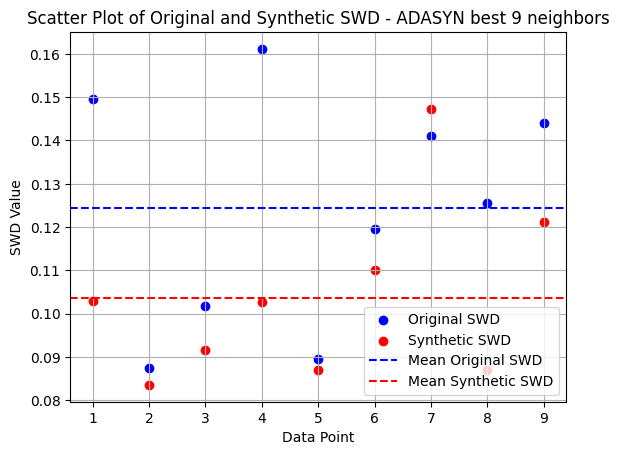

In [28]:
# Run cette cellule si tu veux plot la SWD pour ADASYN
import matplotlib.pyplot as plt

# Original data
original_SWD = [0.1494724173052161, 0.08738305652271, 0.10177980033066224, 
                0.16114167092187578, 0.08944277235615616, 0.11949330877646834, 
                0.1410807932279809, 0.1255289752108854, 0.14405378020681978]

# Synthetic data
synthetic_SWD = SWDs_synth
# Number of points
num_points = len(original_SWD)

# Scatter plot
plt.scatter(range(1, num_points + 1), original_SWD, color='blue', label='Original SWD')
plt.scatter(range(1, num_points + 1), synthetic_SWD, color='red', label='Synthetic SWD')

# Plotting mean lines
plt.axhline(y=sum(original_SWD)/num_points, color='blue', linestyle='--', label='Mean Original SWD')
plt.axhline(y=sum(synthetic_SWD)/num_points, color='red', linestyle='--', label='Mean Synthetic SWD')

# Adding labels and legend
plt.xlabel('Data Point')
plt.ylabel('SWD Value')
plt.title('Scatter Plot of Original and Synthetic SWD - ADASYN best 9 neighbors')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


Si Oversampling avec SVM SMOTE , Run la cellule suivante 

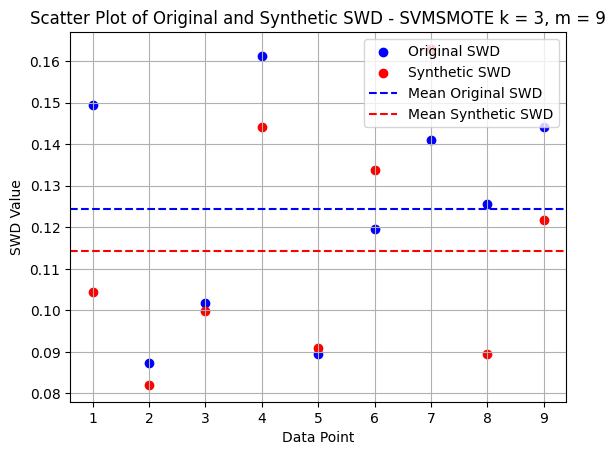

In [26]:
# Run cette cellule si tu veux plot la SWD pour SVM SMOTE

# Original data
original_SWD = [0.1494724173052161, 0.08738305652271, 0.10177980033066224, 
                0.16114167092187578, 0.08944277235615616, 0.11949330877646834, 
                0.1410807932279809, 0.1255289752108854, 0.14405378020681978]

# Synthetic data
synthetic_SWD = SWDs

# Number of points
num_points = len(original_SWD)

# Scatter plot
plt.scatter(range(1, num_points + 1), original_SWD, color='blue', label='Original SWD')
plt.scatter(range(1, num_points + 1), synthetic_SWD, color='red', label='Synthetic SWD')

# Plotting mean lines
plt.axhline(y=sum(original_SWD)/num_points, color='blue', linestyle='--', label='Mean Original SWD')
plt.axhline(y=sum(synthetic_SWD)/num_points, color='red', linestyle='--', label='Mean Synthetic SWD')

# Adding labels and legend
plt.xlabel('Data Point')
plt.ylabel('SWD Value')
plt.title('Scatter Plot of Original and Synthetic SWD - SVMSMOTE k = 3, m = 9')
plt.legend()

# Show plot
plt.grid(True)
plt.show()
